# Neural Network for MNIST Data Set

#### Classify 10 Different Numbers without TensorFlow
In this NoteBook we will create a nerual network that can classify HandWriten Images in 10 different categories, first we will start by importing the libraries for using MNIST

MNIST is a Data set that is udes specifically for people that start right now with Machine Learning and Neural Network and want to build something without having to worry about data sets regularization of the data and in general the input of the algorithm

This dataset will provide 6000 images all of them with size $[28,28]$ 

## Importing the MNIST DataSet

In [51]:
import mnist
import scipy.misc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

The next step is to use *mnist* in order to save in different variables the images and labels of the training and test sets.

In [52]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()

test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [53]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


You can show the images just by writing ***plt.imshow*** and then use the specific image with this command line ***train_images[5,:,:]***

Don't forget to show the results just by writing ***plt.show()***

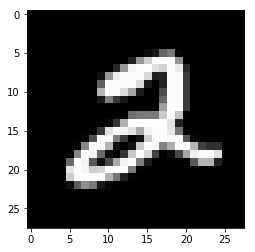

 The number in this image is  2


In [54]:
Index = 5

imgplot = plt.imshow(train_images[Index,:,:], cmap = 'gray')
plt.show()

print(" The number in this image is ", train_labels[Index])

It is really important to transform every image into a vector with $28*28 = 784$ features, this enable as to use this images - pixels as idividuals features that will be used as input in the Nueral Network

In [55]:
print(train_images.shape)
num_Imag = train_images.shape[0]
nH = train_images.shape[1]
nW = train_images.shape[2]
Tr_Im = train_images.reshape((num_Imag,nH*nW))
Tr_Im = np.transpose(Tr_Im)
Tr_lab = train_labels
print(Tr_Im.shape)

#=============Parameters===================
Batch = 500
m=Batch
lambda1 = 1
#=============Parameters===================

(60000, 28, 28)
(784, 60000)


## We need to Change Y ( train_labels) from Hot-Vector to Binary representation 

Example of a Hot Vector:
$$Y = [0,2,1,3]$$
Example of the Binary representation
$$ Y = 
\begin{bmatrix}
    1&0&0&0\\
    0&0&1&0\\
    0&1&0&0\\
    0&0&0&1\\
  \end{bmatrix} $$

In [56]:
def HotVector(targets,n_labels):
    Ytr = np.zeros((targets.shape[0], n_labels)) #empty one-hot matrix
    Ytr[np.arange(targets.shape[0]), targets] = 1 #set target idx to 1

    Ytr=np.transpose(Ytr)

    print(Ytr[:,0:5]) # We will show only the first 5 results

    print(Ytr.shape)
    return Ytr

In [57]:
n_labels = 10 # How many labels we have (10 different numbers)


targets = train_labels
print(targets[0:5]) # We will show only the first 5 results
print(targets.shape)
Ytr = HotVector(targets,n_labels)


[5 0 4 1 9]
(60000,)
[[ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]]
(10, 60000)


### Activation Function - Sigmoid 
It is really important to apply non-linearity (or else activation function) to the result *Z*, this is happening for several reasons but the important part is what activation function will be used
Two classical ones are Sigmoid and ReLU and in this particular example will be used the Sigmoid function

$$ a = \frac{1}{1+\exp^{-z}}$$
<img src = "img/Sigmoid.png" style="width:350;height:250px;">



In [58]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

# Transfer Data from a Layer to the Next one

You need to multiply two arrays, *X*, *W* and then add the bias *b* with broadcasting in every input image

$$Z = W*X + b$$

\begin{equation*}
Z = 
   \begin{bmatrix}
    w_{00} & w_{10} & w_{20} & w_{30} & \dotsc & w_{m0} \\
    w_{01}& w_{11} & w_{21} & w_{31} & \dotsc & w_{m1}\\
    \vdots & \vdots & \vdots & \vdots & \vdots & \vdots\\
    w_{0n} & w_{1n} & w_{2n} & w_{3n} & \dotsc & w_{mn} \\
  \end{bmatrix}
  \begin{bmatrix}
    2&100& \dotsc & 32\\
    23&43& \dotsc & 20\\
    122&23& \dotsc & 61\\
    244&44& \dotsc & 22\\
    \vdots & \vdots  & \vdots &  \vdots \\
    112&20& \dotsc & 1 \\
  \end{bmatrix}
  +
  \begin{bmatrix}
    b_{0} \\
    b_{1} \\
    \vdots \\
    b_{n} 
  \end{bmatrix}
\end{equation*}


<br><center> $ [60000,20] = [20,784]*[784,60000] + [20,1] $ </center></br>

In [59]:
def Forward_Propagation(X,W,b):
    
    Z = np.matmul(W, X) + b
    A = sigmoid(Z)
    
    return A,Z

# Forward Propagation with SoftMax Funciton

In this particula problem we have 10 different classes which are the 10 different numbers $[0,1, \dots, 9]$, this means that the last layer have to translated into a propability distribution, with result the sumation of every node in the last layer is equal to 1. 

More specifically, the last layer will be equal to 
$$A = \frac{e^{Z}}{\sum_{n=1}^{N}{e^{Z_n}}}$$

In [60]:
def Forward_Propagation_SoftMax(X,W,b):
    
    Z = np.matmul(W, X) + b
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    
    return A,Z

# Loss Function for Multiclass

Because we are using Cross entropy loss function   
$$C = - \sum_{k=1}^{m}Y_k*log(A_k^{[L]})$$  

If we want to also have regularization we need to use $W$.
This means that we will penalize the system for large weights and we can do that with the following change in the Cost Function
$$C = - \sum_{k=1}^{m}Y_k*log(A_k^{[L]})+\frac{\lambda}{2m}W^2$$  

In [68]:
def compute_multiclass_loss(Y, Y_hat,W,b):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum - (lambda1/(2*m))*np.sum (np.dot(W.T,W))

    return L

## Back Propagation to the Last Layer

And at the same time Sigmoid function, it can be proven that the derivative of the loss   function with respect to $Z$ is equal to $A^{[2]} - Y$  
$$ dZ^{[2]} = \frac{\partial C}{\partial Z} = \frac{\partial C}{\partial A^{[2]}}   \frac{\partial A^{[2]}}{\partial Z^{[2]}} = A^{[2]} - Y$$  
And $dW^{[2]}$ is always equal to the  $dZ^{[l]}$ multiplied by $A^{[l-1]}$  

$$dW^{[2]} = \frac{1}{m}dZ^{[2]}*A^{[1]} $$

Finally we need to culculate the gradient of bias:

$$db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]},axis=0,keepdims=True)$$

In [62]:
def BackPropagation_Last_Layer(Y,A2,A1):
    
    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    
    return dZ2,dW2,db2

## Back Propagation for every other layer

Now that we culculated the gradient of the second layer we can go to the first layer, and this is why we call this process back propagation, it is neccessary to go from the end to the start of your neural network in order to culculate all the different gradients.

We need to performe the same steps like the previus layer, first we will culculate the $dZ$ and then the $dW$.

We can prove that $dZ$ is equal to:
$$dZ^{[1]} = dZ^{[2]}W^{[2]}*g^{ '[1]}(Z^{[1]})$$


$dZ^{[2]}$ and $W^{[2]}$ make an array multiplication in contrast to the $g^{ '[1]}(Z^{[1]})$ that make an element wise multiplication.
Algo $g$ is the activation function that is been used in the first layer, in this particular example we use a sigmoid function.

$$\sigma^{'}(Z^{[1]}) = \sigma(Z^{[1]})(1-\sigma(Z^{[1]})) =\frac{ - \epsilon^{-Z^{[1]}}}{(1+\epsilon^{-Z^{[1]}})^2}$$

The $dW$ remains the same:
$$dW^{[1]} = dZ^{[1]}X$$

Finally we need to culculate the gradient of bias:

$$db^{[1]} = \frac{1}{m} np.sum(dZ^{[1]},axis=0,keepdims=True)$$

In [63]:
def BackPropagation_Other_Layers(X,dZ2,W2,Z1):
    
    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    
    return dZ1,dW1,db1

# Update the Weights

In [70]:
def Next_Weights(W,b,learning_rate,dW,db):
    
    W = W - learning_rate * (dW+(lambda1/m)*W)
    b = b - learning_rate * db
    
    return W,b

## Building the Artificial Neural Network (ANN) - Combining the Functions



In [71]:

X_train = Tr_Im
Y_train = Ytr


n_x = Tr_Im.shape[0]
n_h1 = 64
n_h2 = 30
digits = 10

learning_rate = 0.5

W1 = np.random.randn(n_h1, n_x)
b1 = np.zeros((n_h1, 1))
W2 = np.random.randn(n_h2, n_h1)
b2 = np.zeros((n_h2, 1))
W3 = np.random.randn(digits, n_h2)
b3 = np.zeros((digits, 1))


C=np.zeros((10000,1))

Point = 0

for i in range(0,10000):
    
    temp = Point+Batch
    
    X = X_train[:,Point:temp]
    Y = Y_train[:,Point:temp]
    
    
    A1,Z1 = Forward_Propagation(X,W1,b1)
    A2,Z2 = Forward_Propagation(A1,W2,b2)
    A3,Z3 = Forward_Propagation_SoftMax(A2,W3,b3)
    
    
    C[i] = compute_multiclass_loss(Y, A3,W3,b3)
    
    
    dZ3,dW3,db3 = BackPropagation_Last_Layer(Y,A3,A2)
    dZ2,dW2,db2 = BackPropagation_Other_Layers(A1,dZ3,W3,Z2)
    dZ1,dW1,db1 = BackPropagation_Other_Layers(X,dZ2,W2,Z1)
    

    W3,b3 = Next_Weights(W3,b3,learning_rate,dW3,db3)
    W2,b2 = Next_Weights(W2,b2,learning_rate,dW2,db2)
    W1,b1 = Next_Weights(W1,b1,learning_rate,dW1,db1)
    
    Point=Point+Batch
    if (Point+Batch>60000):
        Point=0;
        print(C[i])
        
    



C:\Users\milto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[ 1.20945125]
[ 0.89256183]
[ 0.64558375]
[ 0.59054245]
[ 0.48634918]
[ 0.46591925]
[ 0.4352907]
[ 0.39457839]
[ 0.35161468]
[ 0.34887026]
[ 0.34004764]
[ 0.32855789]
[ 0.28703333]
[ 0.28813845]
[ 0.28202847]
[ 0.30421509]
[ 0.28311062]
[ 0.29506638]
[ 0.29291045]
[ 0.3386613]
[ 0.26911342]
[ 0.31575146]
[ 0.30157751]
[ 0.27519407]
[ 0.29690439]
[ 0.28008465]
[ 0.27697502]
[ 0.29448774]
[ 0.29569285]


KeyboardInterrupt: 

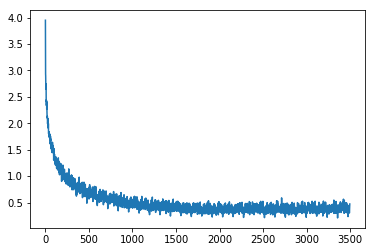

In [72]:
plt.plot(C[1:i])
plt.show()

C:\Users\milto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


[  9.91168147e-03   1.46113403e-02   7.09025972e-02   8.70396403e-01
   6.64101143e-04   4.78003993e-03   8.31143620e-04   5.12466304e-03
   1.77611111e-02   5.01691942e-03]
1.0
[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
3
3


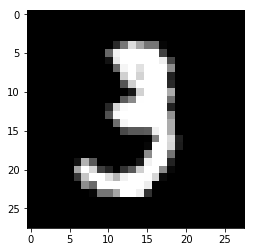

In [73]:
Z1 = np.matmul(W1, X_train) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)
Z3 = np.matmul(W3, A2) + b3
A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=0)
    
    
idx=10
print(A3[:,idx])
print(sum(A3[:,idx])) # Because A2 is the propability to be something and the sumation of this propabilities is equal to 1
print(Y_train[:,idx])

print(np.argmax(A3[:,idx]))
print(np.argmax(Y_train[:,idx]))
imgplot = plt.imshow(train_images[idx,:,:], cmap = 'gray')
plt.show()

In [74]:
import time

#print(m)
count = 0

Nn=A2.shape[1]
print(Nn)

for i in range(Nn):
    if (np.argmax(A3[:,i])==np.argmax(Y_train[:,i])):
        count=count+1
    #else:
        #imgplot = plt.imshow(train_images[i,:,:], cmap = 'gray')
        #plt.show()
        #print(np.argmax(A2[:,i]))
        #time.sleep(1)
     
print(count)
print("Persentage of correct answeres in the Training Set", (count/Nn)*100)

60000
53113
Persentage of correct answeres in the Training Set 88.52166666666666


# Test Images

These are images that where never tested or trained before in this model, so we can observe how whele our model can generalize

In [75]:
print(test_images.shape)
num_Imag = test_images.shape[0]
nH = test_images.shape[1]
nW = test_images.shape[2]
Tr_Im = test_images.reshape((num_Imag,nH*nW))
Tr_Im = np.transpose(Tr_Im)
print(Tr_Im.shape)

Ytr = HotVector(test_labels,n_labels)

(10000, 28, 28)
(784, 10000)
[[ 0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
(10, 10000)


[  9.10477300e-03   3.22310791e-03   3.41284046e-03   6.34901164e-02
   3.83313376e-02   8.39847578e-03   2.27194535e-04   6.37431148e-01
   2.45843629e-03   2.33922570e-01]
1.0
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
7
9


C:\Users\milto\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


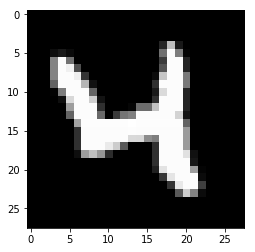

In [76]:
Z1 = np.matmul(W1, Tr_Im) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)
Z3 = np.matmul(W3, A2) + b3
A3 = np.exp(Z3) / np.sum(np.exp(Z3), axis=0)
    
    
idx=20
print(A3[:,idx])
print(sum(A3[:,idx])) # Because A2 is the propability to be something and the sumation of this propabilities is equal to 1
print(Ytr[:,idx])

print(np.argmax(A3[:,idx]))
print(np.argmax(Ytr[:,idx]))
imgplot = plt.imshow(train_images[idx,:,:], cmap = 'gray')
plt.show()

In [77]:
import time

#print(m)
count = 0

Nn=A2.shape[1]
print(Nn)

for i in range(Nn):
    if (np.argmax(A3[:,i])==np.argmax(Ytr[:,i])):
        count=count+1
    #else:
        #imgplot = plt.imshow(train_images[i,:,:], cmap = 'gray')
        #plt.show()
        #print(np.argmax(A2[:,i]))
        #time.sleep(1)
     
print(count)
print("Persentage of correct answeres in the Test Set", (count/Nn)*100)

10000
8902
Persentage of correct answeres in the Test Set 89.02
